# Simple raster analysis

In this notebook, we will do some simple raster analysis using a raster dataset that depicts elevation data for a small area along the Maine coastline. We will open the dataset, read the data, create a plot, classify the data as either land (elevation > 0) or water (elevation <= 0), and finally save the classified data to a new file.

We will first import the modules we need for this analysis.

In [17]:
import rasterio
from rasterio.plot import show
import numpy as np

Next, we will open the elevation dataset.

In [8]:
elev_dataset = rasterio.open('./data/elev_data.tif')

We will then print some important properties of the dataset - the number of bands (count) and the number of rows in the image (width) and the number of columns (height).

In [9]:
print(elev_dataset.count)
print(elev_dataset.width)
print(elev_dataset.height)

1
538
668


Next, we will see what the coordinate system the image is in.

In [10]:
print(elev_dataset.crs)

EPSG:4269


Now, we will read in the elevation data, which is stored in band 1.

In [21]:
elev_data = elev_dataset.read(1)
elev_data

array([[15.801798, 15.07564 , 14.408225, ..., -2.      , -2.      ,
        -2.      ],
       [18.17905 , 17.739887, 16.89227 , ..., -2.      , -2.      ,
        -2.      ],
       [20.5534  , 19.614489, 17.973846, ..., -2.      , -2.      ,
        -2.      ],
       ...,
       [-2.      , -2.      , -2.      , ..., -2.6     , -2.6     ,
        -2.6     ],
       [-2.      , -2.      , -2.      , ..., -2.6     , -2.6     ,
        -2.6     ],
       [-2.      , -2.      , -2.      , ..., -2.6     , -2.6     ,
        -2.6     ]], dtype=float32)

Next, we will plot the data to get a sense of what data we're dealing with.

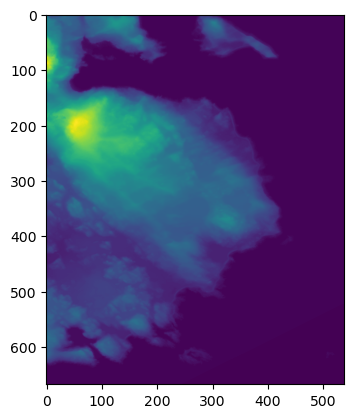

<Axes: >

In [22]:
show(elev_data)

This looks good. Most of the left side of the image represents land, with lighter colored pixels representing higher elevations. Most of the right side of the image represents ocean, with darker pixels representing sea level elevation. For now, we don't need to know exactly what colors represent what elevations. We also don't need to be concerned with the fact that the axes don't represent geographic coordinates. We're just trying to get a sense of the data in the image.

Next, we will classify the pixels based on their elevation data. We will assume that all areas with an elevation > 0 represent land and all areas with an elevation <= 0 represent ocean. We will assign the land pixels the value 1 and ocean pixels the value 0. This way we can create a dataset which we can use to mask out the ocean.

To do this, we will create a function "classify," which returns 0 if a number is equal to or less than 0, and 1 otherwise. We then use np.vectorize to create a new "do_mask" function from the classify function. This lets us execute the classify function on each element in the two-dimensional data array. The result is the "masked_data," which is a 2-d array of 1's and 0's, as we would expect. 

In [12]:
def classify(num):
    if (num <= 0):
        return 0
    else:
        return 1

do_mask = np.vectorize(classify)
masked_data = do_mask(elev_data)
masked_data

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Next, we're going to plot the data to see what we've got.

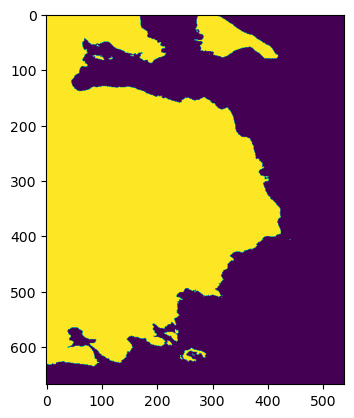

<Axes: >

In [23]:
show(masked_data)

This looks good. The yellow patch represents land and the purple patch represents ocean. The axes are not in spatial coordinates but that's OK. We just want a quick visualization of whether it worked or not.

Now, let's take a look at how numpy is storing the masked data.

In [13]:
type(masked_data.dtype)

numpy.dtype[int64]

It looks like the data is being stored as a 64-bit integer. This is clearly too big for data with just two values. When saving the data to a new file, we should save it as 8-bit integer instead.

Let's now open a new dataset, write the masked data to it, and close the file. We're done!

In [14]:
mask_dataset = rasterio.open(
    './data/mask.tif',
    'w',
    driver='GTiff',
    height=elev_dataset.height,
    width=elev_dataset.width,
    count=1,
    dtype='uint8',
    crs=elev_dataset.crs,
    transform=elev_dataset.transform,
)
mask_dataset.write(masked_data, 1)
mask_dataset.close()